# Example usage of ArCO-GP

This notebook illustrates Bayesian causal inference with ArCO-GP, i.e., using ArCO for approximate causal order inference with limited parent set size
and a GP mechanism model.


In [2]:

# imports
%reload_ext autoreload
%autoreload 2
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from src.abci_arco_gp import ABCIArCOGP as ABCI
from src.config import ABCIArCOGPConfig
from src.environments.experiment import gather_data
from src.environments.generic_environments import *
from src.mechanism_models.mechanisms import get_mechanism_key


First, we generate a ground truth environment/SCM.


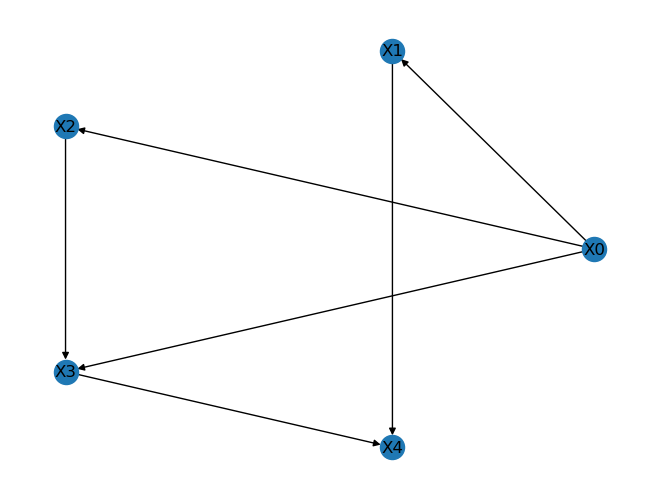

In [ ]:
# init environment

# specify the number of nodes 
num_nodes = 5
env_cfg = EnvironmentConfig()
env_cfg.num_observational_train_samples = 30
env_cfg.num_observational_test_samples = 20
env_cfg.generate_static_intr_dataset = True
env_cfg.num_interventional_train_samples = 10
env_cfg.num_train_interventions = 5
env_cfg.num_interventional_test_samples = 0#7
env_cfg.num_test_interventions = 0#3
env_cfg.linear = False
env_cfg.normalise_data = True

env_cfg.interventional_queries = None
env_cfg.num_test_queries = 30 #but not used

env = BarabasiAlbert(num_nodes, env_cfg)

# plot true graph
nx.draw(env.graph, nx.circular_layout(env.graph), labels=dict(zip(env.graph.nodes, env.graph.nodes)))


Here, we create an ABCI instance with the desired experimental design policy.

In [ ]:

cfg = ABCIArCOGPConfig()
#cfg.policy = 'static-obs-dataset'
cfg.policy = 'graph-info-gain'
#cfg.policy = 'random'
cfg.num_experiments = 3 #to get some iterative behaviour
cfg.max_ps_size = 2
cfg.num_workers = 1
cfg.num_arco_steps = 100
abci = ABCI(env, cfg)



We can now run a number of ABCI loops.

In [28]:

abci.run()

# plot loss over experiments
ax = plt.figure().gca()
plt.plot(abci.stats['arco_loss'], label='arco_loss')
plt.xlabel('Number of Steps')
plt.ylabel('Loss')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend()

NOw running ARCO GP with policy = graph-info-gain
There are 3 planned experiments
Starting experiment cycle 1/3...
Design and perform experiment...
Optimising causal order model...
Updating 50 GP's hyperparams on 1 experiments...
Stopping GP parameter optimization after 17 steps ...
Updated 10/50 GPs... 
Stopping GP parameter optimization after 12 steps ...
Updated 20/50 GPs... 
Stopping GP parameter optimization after 20 steps ...
Updated 30/50 GPs... 
Stopping GP parameter optimization after 24 steps ...
Updated 40/50 GPs... 
Stopping GP parameter optimization after 14 steps ...
Updated 50/50 GPs... 
Step 1 of 100, com loss is 7.5290937423706055
Step 21 of 100, com loss is 1.7803854942321777
Step 41 of 100, com loss is 2.7853610515594482
Step 61 of 100, com loss is 2.993157386779785
Step 81 of 100, com loss is 3.1169626712799072
Stopping com optimization after 87 steps ...
There are currently 50 unique GPs in our model.
Logging stats...
Computing structure metrics (AUROC, AUPRC, SHD,

AssertionError: None

Print structure learning stats.

In [24]:
# optionally: recompute the structure learning stats
# abci.stats.clear()
# abci.compute_stats()

print()
print(f"ESHD {abci.stats['eshd']} vs. ESHD CPDAG {abci.stats['eshd_cpdag']}")
print(f"True Num E {env.graph.number_of_edges()} vs. E-NUM Edges{abci.stats['enum_edges']}")
print(f"A-AID {abci.stats['aaid']}   vs. A-AID cpdag {abci.stats['aaid_cpdag']}")
print(f"P-AID {abci.stats['paid']}   vs. P-AID cpdag {abci.stats['paid_cpdag']}")
print(f"OSET-AID {abci.stats['oset_aid']} vs. OSET-AID cpdag {abci.stats['oset_aid_cpdag']} ")
print(f"ORDER-AID {abci.stats['order_aid']} ")
print()
print(f"F1 {abci.stats['ef1']}     vs. F1 cpdag {abci.stats['ef1_cpdag']}")
print(f"TPR {abci.stats['etpr']} vs. TPR cpdag {abci.stats['etpr_cpdag']}")
print(f"TNR {abci.stats['etnr']} vs. TNR cpdag {abci.stats['etnr_cpdag']}")
print(f"FNR {abci.stats['efnr']} vs. FNR cpdag {abci.stats['efnr_cpdag']}")
print(f"FPR {abci.stats['efpr']} vs. FPR cpdag {abci.stats['efpr_cpdag']}")
print(f"AUROC {abci.stats['auroc']}  vs. AUROC CPDAG {abci.stats['auroc_cpdag']}")
print(f"AUPRC {abci.stats['auprc']}  vs. AUPRC CPDAG {abci.stats['auprc_cpdag']}")
print()



ESHD [tensor(2.), tensor(2.), tensor(2.)] vs. ESHD CPDAG [tensor(3.7563e-08), tensor(3.7738e-08), tensor(3.7096e-08)]
True Num E 6 vs. E-NUM Edges[tensor(6.), tensor(6.), tensor(6.)]
A-AID [tensor(0.3000), tensor(0.3000), tensor(0.3000)]   vs. A-AID cpdag [tensor(7.4269e-44), tensor(0.), tensor(0.)]
P-AID [tensor(0.3000), tensor(0.3000), tensor(0.3000)]   vs. P-AID cpdag [tensor(7.4269e-44), tensor(0.), tensor(0.)]
OSET-AID [tensor(0.3000), tensor(0.3000), tensor(0.3000)] vs. OSET-AID cpdag [tensor(7.4269e-44), tensor(0.), tensor(0.)] 
ORDER-AID [tensor(0.3000), tensor(0.3000), tensor(0.3000)] 

F1 [tensor(0.8333), tensor(0.8333), tensor(0.8333)]     vs. F1 cpdag [tensor(1.), tensor(1.), tensor(1.)]
TPR [tensor(0.8333), tensor(0.8333), tensor(0.8333)] vs. TPR cpdag [tensor(1.), tensor(1.), tensor(1.)]
TNR [tensor(0.9286), tensor(0.9286), tensor(0.9286)] vs. TNR cpdag [tensor(1.), tensor(1.), tensor(1.)]
FNR [tensor(0.1667), tensor(0.1667), tensor(0.1667)] vs. FNR cpdag [tensor(0.), te

Finally, we can have a look at the learned vs. true mechanisms. Here, we compare univariate mechanisms.

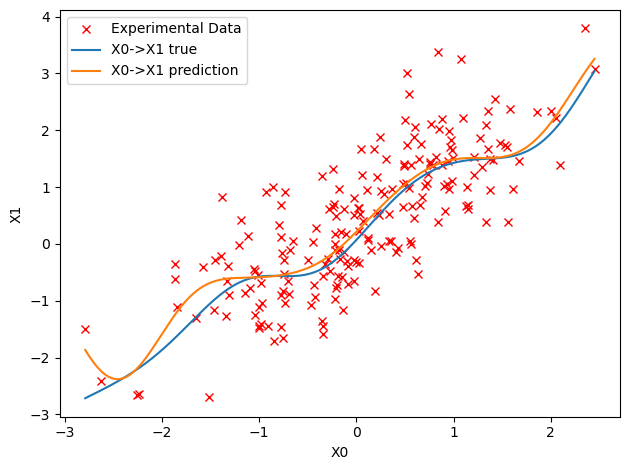

In [25]:
# setup
parent = 'X0'
target = 'X1'  # target node
num_points = 500

# compute true mechanism values
xdata, ydata = gather_data(abci.experiments, target, parents=[parent])
xrange = torch.linspace(xdata.min(), xdata.max(), num_points).unsqueeze(1)
ytrue = env.apply_mechanism(xrange, get_mechanism_key(target, [parent])).detach()

# compute predicted mechanism values
ypred = abci.mechanism_model.apply_mechanism(xrange.expand(-1, env.num_nodes),
                                             get_mechanism_key(target, [parent])).detach()

plt.figure()
plt.plot(xdata, ydata, 'rx', label='Experimental Data')
plt.plot(xrange, ytrue, label=f'{parent}->{target} true')
plt.plot(xrange, ypred, label=f'{parent}->{target} prediction')
plt.xlabel(parent)
plt.ylabel(target)
plt.legend()
plt.tight_layout()



Here, we compare bi-variate mechanisms.


Function values for X3 in range [(-2.5305070877075195, 2.8019933700561523)].


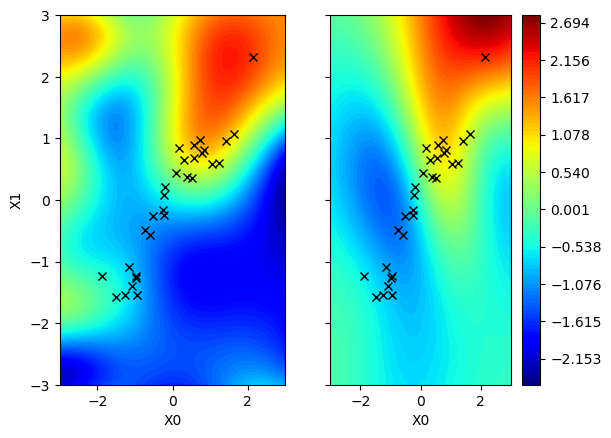

In [10]:
# plotting a bivariate mechanism
parents = ['X0', 'X1']
target = 'X3'
num_points = 100

# create meshgrid and compute true mechanism values
range_min = range_max = 3.
xrange = torch.linspace(-range_min, range_max, num_points)
yrange = torch.linspace(-range_min, range_max, num_points)
xgrid, ygrid = torch.meshgrid(xrange, yrange, indexing='ij')
inputs = torch.stack((xgrid, ygrid), dim=2).view(-1, 2)
ztrue = env.apply_mechanism(inputs, get_mechanism_key(target, parents)).detach().view(num_points, num_points).numpy()

# compute predicted mechanism values
tmp = torch.empty(num_points ** 2, env.num_nodes)
tmp[:, env.node_labels.index(parents[0])] = inputs[:, 0]
tmp[:, env.node_labels.index(parents[1])] = inputs[:, 1]
zpred = abci.mechanism_model.apply_mechanism(tmp, get_mechanism_key(target, parents))
zpred = zpred.cpu().detach().view(num_points, num_points).numpy()

zmin = min(ztrue.min().item(), zpred.min().item())
zmax = max(ztrue.max().item(), zpred.max().item())
levels = torch.linspace(zmin, zmax, 100).cpu().numpy()
print(f'Function values for {target} in range [{zmin, zmax}].')

# plot mechanisms
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)
cp1 = axes[0].contourf(xgrid.cpu(), ygrid.cpu(), ztrue, cmap=plt.get_cmap('jet'), levels=levels, vmin=zmin, vmax=zmax,
                       antialiased=False)
cp2 = axes[1].contourf(xgrid.cpu(), ygrid.cpu(), zpred, cmap=plt.get_cmap('jet'), levels=levels, vmin=zmin, vmax=zmax,
                       antialiased=False)

sample_inputs, sample_targets = gather_data(abci.experiments, target, parents=parents)

axes[0].plot(sample_inputs[:, 0].cpu(), sample_inputs[:, 1].cpu(), 'kx')
axes[1].plot(sample_inputs[:, 0].cpu(), sample_inputs[:, 1].cpu(), 'kx')
axes[0].set_xlabel(parents[0])
axes[0].set_ylabel(parents[1])
ax.set_xlim([-range_min, range_max])
ax.set_ylim([-range_min, range_max])
axes[1].set_xlabel(parents[0])
_ = fig.colorbar(cp2)
